# **COVID-19 World Vaccine Adverse Reactions**

In [103]:
!gdown --id 1R4XBDeHTXdvR-26bkznsAGI8JbvU5H8j

Downloading...
From: https://drive.google.com/uc?id=1R4XBDeHTXdvR-26bkznsAGI8JbvU5H8j
To: /content/Vaccine_Adverse_Reactions.zip
8.95MB [00:00, 78.9MB/s]


In [104]:
!unzip Vaccine_Adverse_Reactions.zip

Archive:  Vaccine_Adverse_Reactions.zip
replace 2021VAERSDATA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2021VAERSDATA.csv       
replace 2021VAERSSYMPTOMS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2021VAERSSYMPTOMS.csv   
replace 2021VAERSVAX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2021VAERSVAX.csv        


# Data preprocessing

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
# df_2021_vaersdata = pd.read_csv('2021VAERSDATA.csv')
df_2021_vaerssymptoms = pd.read_csv('2021VAERSSYMPTOMS.csv')
df_2021_vaersvax = pd.read_csv('2021VAERSVAX.csv')

In [107]:
df_2021_vaerssymptoms.sample(10)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
15784,930231,Hypoaesthesia,24.0,Paraesthesia,24.0,NaN,NaN,NaN,NaN,NaN,NaN
20365,933955,Headache,24.0,Pain in extremity,24.0,NaN,NaN,NaN,NaN,NaN,NaN
36883,1048815,Oedema peripheral,23.1,Pain,23.1,NaN,NaN,NaN,NaN,NaN,NaN
15900,930325,Fatigue,23.1,Feeling abnormal,23.1,Headache,23.1,Injection site pain,23.1,NaN,NaN
45401,1084267,Dizziness,24.0,Nausea,24.0,NaN,NaN,NaN,NaN,NaN,NaN
31517,1023507,Lymphadenopathy,23.1,Nightmare,23.1,Ocular hyperaemia,23.1,Pharyngeal mass,23.1,Polymerase chain reaction,23.1
23542,953107,Facial paralysis,23.1,Facial paresis,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,SARS-CoV-2 test negative,23.1
41096,1062962,White blood cell count increased,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20321,933912,Injection site erythema,24.0,Injection site induration,24.0,Injection site pruritus,24.0,Injection site swelling,24.0,Injection site warmth,24.0
18238,932199,Pain in extremity,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_2021_vaerssymptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   SYMPTOM1         48110 non-null  object 
 2   SYMPTOMVERSION1  48110 non-null  float64
 3   SYMPTOM2         39351 non-null  object 
 4   SYMPTOMVERSION2  39351 non-null  float64
 5   SYMPTOM3         31542 non-null  object 
 6   SYMPTOMVERSION3  31542 non-null  float64
 7   SYMPTOM4         24444 non-null  object 
 8   SYMPTOMVERSION4  24444 non-null  float64
 9   SYMPTOM5         18560 non-null  object 
 10  SYMPTOMVERSION5  18560 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [109]:
df_2021_vaersvax.sample(10)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
20860,994254,COVID19,PFIZER\BIONTECH,EL3247,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
34424,1106186,COVID19,MODERNA,013M20A,1,OT,LA,COVID19 (COVID19 (MODERNA))
24168,1040170,COVID19,MODERNA,NaN,1,IM,NaN,COVID19 (COVID19 (MODERNA))
15357,933841,COVID19,PFIZER\BIONTECH,EL0140,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
25347,1046480,COVID19,PFIZER\BIONTECH,NaN,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
28449,1051569,COVID19,PFIZER\BIONTECH,EN6200,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
22061,1011025,COVID19,PFIZER\BIONTECH,NaN,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
10223,928279,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
15471,933965,COVID19,MODERNA,NaN,UNK,IM,LA,COVID19 (COVID19 (MODERNA))
32642,1083726,COVID19,MODERNA,010A21A,1,OT,NaN,COVID19 (COVID19 (MODERNA))


In [110]:
df_2021_vaersvax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [111]:
df = pd.merge(df_2021_vaerssymptoms, df_2021_vaersvax, how='left', on='VAERS_ID')
df

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49016,1113920,Nasal discomfort,23.1,Night sweats,23.1,Platelet count,23.1,Platelet count decreased,23.1,Pyrexia,23.1,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49017,1113920,Rash,23.1,SARS-CoV-2 test,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49018,1113963,Haemophagocytic lymphohistiocytosis,23.1,SARS-CoV-2 test,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EL9264,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49019,1115045,Death,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA))


In [112]:
df.isna().sum()

VAERS_ID               0
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2            8901
SYMPTOMVERSION2     8901
SYMPTOM3           16822
SYMPTOMVERSION3    16822
SYMPTOM4           24005
SYMPTOMVERSION4    24005
SYMPTOM5           29975
SYMPTOMVERSION5    29975
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14957
VAX_DOSE_SERIES      101
VAX_ROUTE          11278
VAX_SITE           10464
VAX_NAME               0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49021 entries, 0 to 49020
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         49021 non-null  int64  
 1   SYMPTOM1         49021 non-null  object 
 2   SYMPTOMVERSION1  49021 non-null  float64
 3   SYMPTOM2         40120 non-null  object 
 4   SYMPTOMVERSION2  40120 non-null  float64
 5   SYMPTOM3         32199 non-null  object 
 6   SYMPTOMVERSION3  32199 non-null  float64
 7   SYMPTOM4         25016 non-null  object 
 8   SYMPTOMVERSION4  25016 non-null  float64
 9   SYMPTOM5         19046 non-null  object 
 10  SYMPTOMVERSION5  19046 non-null  float64
 11  VAX_TYPE         49021 non-null  object 
 12  VAX_MANU         49021 non-null  object 
 13  VAX_LOT          34064 non-null  object 
 14  VAX_DOSE_SERIES  48920 non-null  object 
 15  VAX_ROUTE        37743 non-null  object 
 16  VAX_SITE         38557 non-null  object 
 17  VAX_NAME    

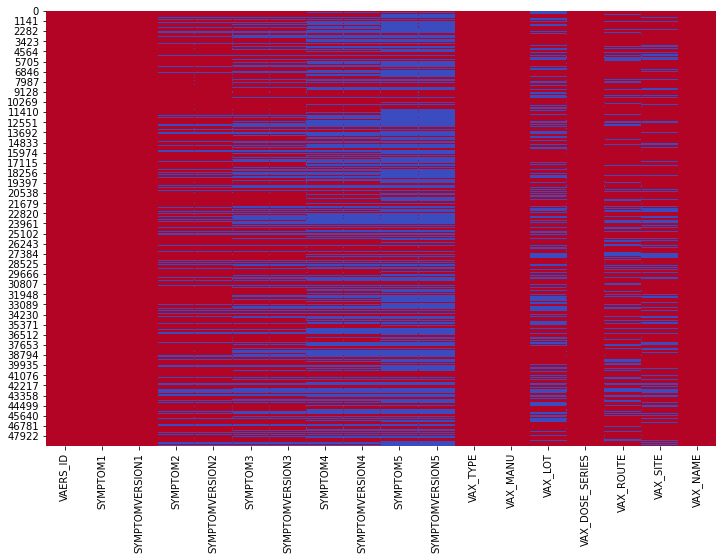

In [114]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm_r')

In [115]:
df['SYMPTOM1'].value_counts()[:20]

Chills                     3268
Arthralgia                 1962
Headache                   1490
Dizziness                  1459
Injection site erythema    1417
Fatigue                    1391
Asthenia                   1147
Pyrexia                    1082
Death                      1017
COVID-19                    865
Erythema                    794
Pain                        761
Nausea                      675
Pain in extremity           639
Injection site pain         533
Myalgia                     484
Rash                        471
Dyspnoea                    457
Pruritus                    452
Chest discomfort            418
Name: SYMPTOM1, dtype: int64

In [116]:
df['SYMPTOM2'].value_counts()[:20]

Headache                    2207
Fatigue                     1753
Chills                      1540
Pyrexia                     1063
Dizziness                   1048
Pain                         968
Nausea                       855
Injection site pain          849
Myalgia                      689
Pain in extremity            653
Dyspnoea                     637
Injection site pruritus      566
SARS-CoV-2 test positive     457
Pruritus                     446
Injection site erythema      439
Death                        403
Rash                         401
Diarrhoea                    398
Vomiting                     349
Asthenia                     335
Name: SYMPTOM2, dtype: int64

In [117]:
df['SYMPTOM3'].value_counts()[:20]

Headache                   1832
Pyrexia                    1290
Fatigue                    1215
Pain                       1195
Nausea                     1042
Pain in extremity           714
Myalgia                     691
Injection site pain         665
Injection site swelling     587
Dizziness                   585
Chills                      541
Dyspnoea                    509
Injection site pruritus     419
Pruritus                    380
Vomiting                    341
Rash                        327
Injection site warmth       306
Malaise                     300
Diarrhoea                   278
Hyperhidrosis               276
Name: SYMPTOM3, dtype: int64

In [118]:
df['SYMPTOM4'].value_counts()[:20]

Pyrexia                     1323
Headache                    1192
Pain                        1105
Nausea                       977
Fatigue                      637
Myalgia                      613
Pain in extremity            601
Injection site pain          478
Injection site swelling      409
Injection site warmth        395
Vomiting                     348
Dyspnoea                     310
Dizziness                    297
Pruritus                     276
Malaise                      274
Rash                         264
Paraesthesia                 245
Urticaria                    222
Injection site pruritus      188
SARS-CoV-2 test negative     185
Name: SYMPTOM4, dtype: int64

In [119]:
df['SYMPTOM5'].value_counts()[:20]

Pyrexia                     1192
Pain                         861
Nausea                       670
Headache                     613
Pain in extremity            552
Myalgia                      434
Vomiting                     399
Fatigue                      328
Injection site pain          282
Dyspnoea                     245
Injection site swelling      232
Injection site warmth        223
Pruritus                     219
Malaise                      205
Paraesthesia                 192
Rash                         185
Urticaria                    179
SARS-CoV-2 test negative     171
Hyperhidrosis                144
SARS-CoV-2 test              136
Name: SYMPTOM5, dtype: int64

In [120]:
df['SYMPTOM2'] = df['SYMPTOM2'].fillna('No symptom')
df['SYMPTOM3'] = df['SYMPTOM3'].fillna('No symptom')
df['SYMPTOM4'] = df['SYMPTOM4'].fillna('No symptom')
df['SYMPTOM5'] = df['SYMPTOM5'].fillna('No symptom')

In [121]:
df.isna().sum()

VAERS_ID               0
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2               0
SYMPTOMVERSION2     8901
SYMPTOM3               0
SYMPTOMVERSION3    16822
SYMPTOM4               0
SYMPTOMVERSION4    24005
SYMPTOM5               0
SYMPTOMVERSION5    29975
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14957
VAX_DOSE_SERIES      101
VAX_ROUTE          11278
VAX_SITE           10464
VAX_NAME               0
dtype: int64

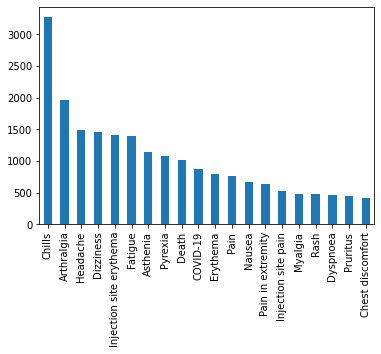

In [122]:
df['SYMPTOM1'].value_counts()[:20].plot.bar()

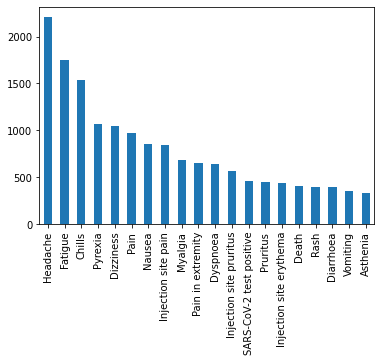

In [123]:
df['SYMPTOM2'].value_counts()[1:21].plot.bar()

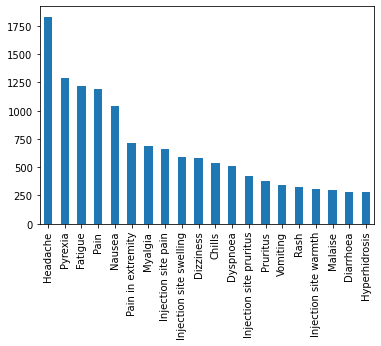

In [124]:
df['SYMPTOM3'].value_counts()[1:21].plot.bar()

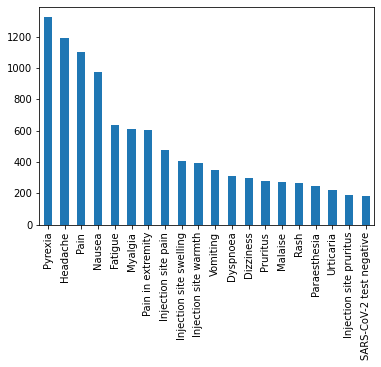

In [125]:
df['SYMPTOM4'].value_counts()[1:21].plot.bar()

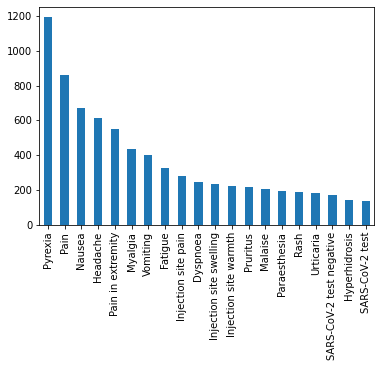

In [126]:
df['SYMPTOM5'].value_counts()[1:21].plot.bar()

In [127]:
SYMPTOM1 = df['SYMPTOM1'].value_counts()
SYMPTOM1

Chills                           3268
Arthralgia                       1962
Headache                         1490
Dizziness                        1459
Injection site erythema          1417
                                 ... 
Hypovolaemia                        1
Barium swallow                      1
Intestinal perforation              1
Ischaemic cerebral infarction       1
Urethral pain                       1
Name: SYMPTOM1, Length: 2431, dtype: int64

In [128]:
SYMPTOM2 = df['SYMPTOM2'].value_counts()
SYMPTOM2

No symptom                    8901
Headache                      2207
Fatigue                       1753
Chills                        1540
Pyrexia                       1063
                              ... 
Coronary artery thrombosis       1
Blood corticotrophin             1
Stool analysis normal            1
Cytokine test                    1
Prostate cancer metastatic       1
Name: SYMPTOM2, Length: 2356, dtype: int64

In [129]:
SYMPTOM3 = df['SYMPTOM3'].value_counts()
SYMPTOM3

No symptom                  16822
Headache                     1832
Pyrexia                      1290
Fatigue                      1215
Pain                         1195
                            ...  
Cerebral artery embolism        1
Imaging procedure               1
Genital herpes                  1
Radicular pain                  1
Debridement                     1
Name: SYMPTOM3, Length: 2134, dtype: int64

In [130]:
SYMPTOM4 = df['SYMPTOM4'].value_counts()
SYMPTOM4

No symptom                          24005
Pyrexia                              1323
Headache                             1192
Pain                                 1105
Nausea                                977
                                    ...  
Cardiac murmur                          1
Paranasal sinus hypersecretion          1
Terminal state                          1
Albumin globulin ratio decreased        1
Sputum increased                        1
Name: SYMPTOM4, Length: 1962, dtype: int64

In [131]:
SYMPTOM5 = df['SYMPTOM5'].value_counts()
SYMPTOM5

No symptom                 29975
Pyrexia                     1192
Pain                         861
Nausea                       670
Headache                     613
                           ...  
Tearfulness                    1
Laziness                       1
Blood phosphorus normal        1
Borrelia test negative         1
Debridement                    1
Name: SYMPTOM5, Length: 1730, dtype: int64

In [132]:
symptom_list = [SYMPTOM1, SYMPTOM2, SYMPTOM3, SYMPTOM4, SYMPTOM5]
symptom_df = pd.DataFrame()

for i in range(5):
  for j in range(20):
    symptom_df[f'count_symptom{i+1}'] = symptom_list[i]
    symptom_df[f'percent_symptom{i+1}'] = (symptom_list[i]/len(df.index))*100  
clean_df = symptom_df.reset_index().rename(columns={'index':'symptom'})
clean_df

,symptom,count_symptom1,percent_symptom1,count_symptom2,percent_symptom2,count_symptom3,percent_symptom3,count_symptom4,percent_symptom4,count_symptom5,percent_symptom5
0,Chills,3268,6.666531,1540.0,3.141511,541.0,1.103609,182.0,0.371269,60.0,0.122397
1,Arthralgia,1962,4.002366,148.0,0.301911,26.0,0.053038,4.0,0.008160,1.0,0.002040
2,Headache,1490,3.039514,2207.0,4.502152,1832.0,3.737174,1192.0,2.431611,613.0,1.250484
3,Dizziness,1459,2.976275,1048.0,2.137859,585.0,1.193366,297.0,0.605863,134.0,0.273352
4,Injection site erythema,1417,2.890598,439.0,0.895535,207.0,0.422268,109.0,0.222354,65.0,0.132596
...,...,...,...,...,...,...,...,...,...,...,...
2426,Hypovolaemia,1,0.002040,2.0,0.004080,1.0,0.002040,1.0,0.002040,NaN,NaN
2427,Barium swallow,1,0.002040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2428,Intestinal perforation,1,0.002040,1.0,0.002040,NaN,NaN,1.0,0.002040,NaN,NaN
2429,Ischaemic cerebral infarction,1,0.002040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
count_df = df[["SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5"]]
count_df = count_df.apply(pd.Series.value_counts)

count_df = count_df.replace(np.nan,0)

count_df["COUNT"] = count_df.sum(axis=1)

count_df = count_df.reset_index().rename(columns={"index":"SYMPTOM"}).sort_values(by="COUNT", ascending=False)[1:]
count_df = count_df.drop(columns=["SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5"])
count_df[:20]

,SYMPTOM,COUNT
1824,Headache,7334.0
3240,Pyrexia,5950.0
963,Chills,5591.0
1556,Fatigue,5324.0
2881,Pain,4890.0
2690,Nausea,4219.0
1283,Dizziness,3523.0
2883,Pain in extremity,3159.0
2635,Myalgia,2911.0
2154,Injection site pain,2807.0


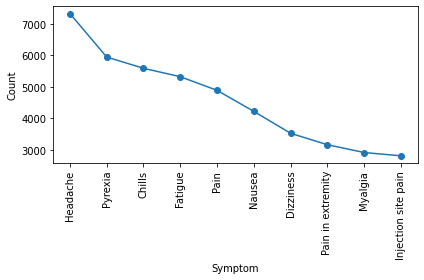

In [134]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = count_df['COUNT'][:10]

labels = count_df['SYMPTOM'][:10]
plt.plot(x, y, marker='o')
plt.ylabel('Count')
plt.xlabel('Symptom')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

In [135]:
df['VAX_MANU'].value_counts()

PFIZER\BIONTECH                      23617
MODERNA                              23173
JANSSEN                               1513
UNKNOWN MANUFACTURER                   301
MERCK & CO. INC.                       147
GLAXOSMITHKLINE BIOLOGICALS            124
SANOFI PASTEUR                          81
SEQIRUS, INC.                           20
PFIZER\WYETH                            19
PROTEIN SCIENCES CORPORATION            12
NOVARTIS VACCINES AND DIAGNOSTICS        9
MEDIMMUNE VACCINES, INC.                 2
BERNA BIOTECH, LTD.                      1
DYNAVAX TECHNOLOGIES CORPORATION         1
EMERGENT BIOSOLUTIONS                    1
Name: VAX_MANU, dtype: int64

In [136]:
vax_df = df.copy()
vax_df

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,Dysphagia,23.1,Epiglottitis,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,Anxiety,23.1,Dyspnoea,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,No symptom,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,No symptom,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49016,1113920,Nasal discomfort,23.1,Night sweats,23.1,Platelet count,23.1,Platelet count decreased,23.1,Pyrexia,23.1,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49017,1113920,Rash,23.1,SARS-CoV-2 test,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49018,1113963,Haemophagocytic lymphohistiocytosis,23.1,SARS-CoV-2 test,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,PFIZER\BIONTECH,EL9264,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49019,1115045,Death,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA))


In [137]:
vaxs = ['MODERNA', 'PFIZER\BIONTECH']

vax_df = vax_df[vax_df['VAX_MANU'].isin(vaxs)]
vax_df

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,Dysphagia,23.1,Epiglottitis,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,Anxiety,23.1,Dyspnoea,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,No symptom,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,No symptom,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49016,1113920,Nasal discomfort,23.1,Night sweats,23.1,Platelet count,23.1,Platelet count decreased,23.1,Pyrexia,23.1,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49017,1113920,Rash,23.1,SARS-CoV-2 test,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49018,1113963,Haemophagocytic lymphohistiocytosis,23.1,SARS-CoV-2 test,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,PFIZER\BIONTECH,EL9264,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
49019,1115045,Death,23.1,No symptom,NaN,No symptom,NaN,No symptom,NaN,No symptom,NaN,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA))


In [138]:
vax_df.drop(columns=['VAERS_ID', 'VAX_LOT',	'VAX_DOSE_SERIES',	'VAX_ROUTE',	'VAX_SITE',	'VAX_NAME', 'VAX_TYPE', \
                     'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
vax_df = pd.concat([vax_df, pd.get_dummies(vax_df['VAX_MANU'], prefix='VAX')],axis=1)

In [140]:
vax_df

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,VAX_MODERNA,VAX_PFIZER\BIONTECH
0,Dysphagia,Epiglottitis,No symptom,No symptom,No symptom,MODERNA,1,0
1,Anxiety,Dyspnoea,No symptom,No symptom,No symptom,MODERNA,1,0
2,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,No symptom,PFIZER\BIONTECH,0,1
3,Dizziness,Fatigue,Mobility decreased,No symptom,No symptom,MODERNA,1,0
4,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,No symptom,MODERNA,1,0
...,...,...,...,...,...,...,...,...
49016,Nasal discomfort,Night sweats,Platelet count,Platelet count decreased,Pyrexia,PFIZER\BIONTECH,0,1
49017,Rash,SARS-CoV-2 test,No symptom,No symptom,No symptom,PFIZER\BIONTECH,0,1
49018,Haemophagocytic lymphohistiocytosis,SARS-CoV-2 test,No symptom,No symptom,No symptom,PFIZER\BIONTECH,0,1
49019,Death,No symptom,No symptom,No symptom,No symptom,MODERNA,1,0


In [141]:
vax_df.drop(columns='VAX_MANU')

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MODERNA,VAX_PFIZER\BIONTECH
0,Dysphagia,Epiglottitis,No symptom,No symptom,No symptom,1,0
1,Anxiety,Dyspnoea,No symptom,No symptom,No symptom,1,0
2,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,No symptom,0,1
3,Dizziness,Fatigue,Mobility decreased,No symptom,No symptom,1,0
4,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,No symptom,1,0
...,...,...,...,...,...,...,...
49016,Nasal discomfort,Night sweats,Platelet count,Platelet count decreased,Pyrexia,0,1
49017,Rash,SARS-CoV-2 test,No symptom,No symptom,No symptom,0,1
49018,Haemophagocytic lymphohistiocytosis,SARS-CoV-2 test,No symptom,No symptom,No symptom,0,1
49019,Death,No symptom,No symptom,No symptom,No symptom,1,0


In [172]:
symptom_df = pd.DataFrame()
symptom_df["SYMPTOM"] = vax_df['SYMPTOM1']
symptom_df["VAX_MODERNA"] = vax_df['VAX_MODERNA']
symptom_df["VAX_PFIZER\BIONTECH"] = vax_df['VAX_PFIZER\BIONTECH']

symptom2_df = pd.DataFrame()
symptom2_df["SYMPTOM"] = vax_df['SYMPTOM2']
symptom2_df["VAX_MODERNA"] = vax_df['VAX_MODERNA']
symptom2_df["VAX_PFIZER\BIONTECH"] = vax_df['VAX_PFIZER\BIONTECH']

symptom3_df = pd.DataFrame()
symptom3_df["SYMPTOM"] = vax_df['SYMPTOM3']
symptom3_df["VAX_MODERNA"] = vax_df['VAX_MODERNA']
symptom3_df["VAX_PFIZER\BIONTECH"] = vax_df['VAX_PFIZER\BIONTECH']

symptom4_df = pd.DataFrame()
symptom4_df["SYMPTOM"] = vax_df['SYMPTOM4']
symptom4_df["VAX_MODERNA"] = vax_df['VAX_MODERNA']
symptom4_df["VAX_PFIZER\BIONTECH"] = vax_df['VAX_PFIZER\BIONTECH']

symptom5_df = pd.DataFrame()
symptom5_df["SYMPTOM"] = vax_df['SYMPTOM5']
symptom5_df["VAX_MODERNA"] = vax_df['VAX_MODERNA']
symptom5_df["VAX_PFIZER\BIONTECH"] = vax_df['VAX_PFIZER\BIONTECH']

symptom_df = symptom_df.append(symptom2_df)
symptom_df = symptom_df.append(symptom3_df)
symptom_df = symptom_df.append(symptom4_df)
symptom_df = symptom_df.append(symptom5_df)
symptom_df

,SYMPTOM,VAX_MODERNA,VAX_PFIZER\BIONTECH
0,Dysphagia,1,0
1,Anxiety,1,0
2,Chest discomfort,0,1
3,Dizziness,1,0
4,Injection site erythema,1,0
...,...,...,...
49016,Pyrexia,0,1
49017,No symptom,0,1
49018,No symptom,0,1
49019,No symptom,1,0


In [173]:
symptom_df = symptom_df.groupby(['SYMPTOM']).sum().sort_values(['VAX_MODERNA','VAX_PFIZER\BIONTECH'],ascending=False)
symptom_df = symptom_df.reset_index()
symptom_df["COUNT"] = symptom_df.sum(axis=1)
symptom_df.drop(index=0, inplace=True)
symptom_df

,SYMPTOM,VAX_MODERNA,VAX_PFIZER\BIONTECH,COUNT
1,Headache,3249.0,3549.0,6798.0
2,Pyrexia,2774.0,2651.0,5425.0
3,Chills,2460.0,2607.0,5067.0
4,Fatigue,2418.0,2556.0,4974.0
5,Pain,2201.0,2325.0,4526.0
...,...,...,...,...
4113,Wound drainage,0.0,1.0,1.0
4114,Wound infection staphylococcal,0.0,1.0,1.0
4115,X-ray dental,0.0,1.0,1.0
4116,X-ray with contrast upper gastrointestinal tra...,0.0,1.0,1.0


In [174]:
symptom_df

,SYMPTOM,VAX_MODERNA,VAX_PFIZER\BIONTECH,COUNT
1,Headache,3249.0,3549.0,6798.0
2,Pyrexia,2774.0,2651.0,5425.0
3,Chills,2460.0,2607.0,5067.0
4,Fatigue,2418.0,2556.0,4974.0
5,Pain,2201.0,2325.0,4526.0
...,...,...,...,...
4113,Wound drainage,0.0,1.0,1.0
4114,Wound infection staphylococcal,0.0,1.0,1.0
4115,X-ray dental,0.0,1.0,1.0
4116,X-ray with contrast upper gastrointestinal tra...,0.0,1.0,1.0


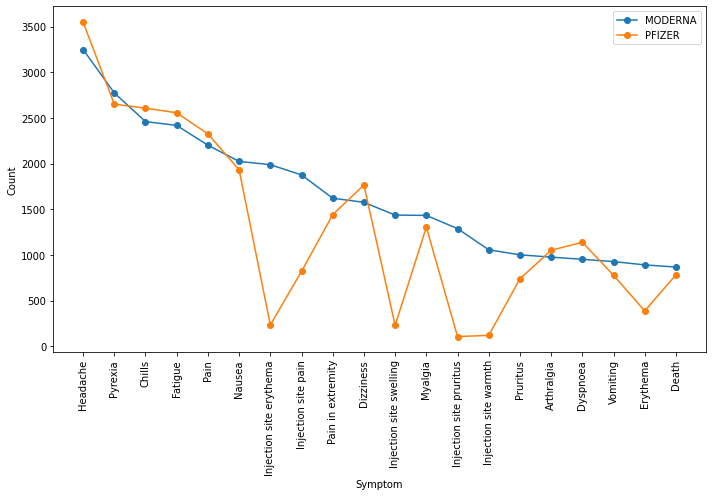

In [183]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = symptom_df['VAX_MODERNA'][:20]
y2 = symptom_df['VAX_PFIZER\BIONTECH'][:20]
labels = symptom_df['SYMPTOM'][:20]

plt.subplots(figsize=(10, 7))
plt.plot(x, y, marker='o', label='MODERNA')
plt.plot(x, y2, marker='o', label='PFIZER')
plt.xticks(x, labels, rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Symptom')
plt.tight_layout()
plt.legend()
plt.show()
